In [300]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

import translators as ts
from multiprocessing import Pool
from tqdm import *

Using state Jakarta server backend.


In [211]:
dataset = pd.read_csv("cleaned_dataset.csv")
dataset

,Unnamed: 0,id,text,Pasien,Usia pasien,Penyakit,Gejala,Tindakan,Outcome,Pertanyaan,Pembuka,Penyebab,Prakondisi,Objek,Penutup,Waktu
0,0,821-1-0,p,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,816-1-0,salam,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,815-1-0,semoga membantu iya,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,814-1-0,hindari konsumsi alkohol rokok,0,0,0,0,1,0,0,0,0,0,1,0,0
4,4,813-1-0,olahraga rutin,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,15-2-735,salahnya periksakan dokter dokter anak sub spe...,0,0,0,0,1,0,0,0,0,0,0,0,0
1455,1455,9-2-0,usia sewajarnya kosa dikuasai anak nama usia d...,1,1,0,0,0,0,0,0,0,0,0,0,0
1456,1456,9-2-196,anak seusia merangkai kalimat mudah dipahami o...,1,0,0,0,0,1,0,0,0,0,0,0,0
1457,1457,9-2-331,mengalami menarik mahir menceritakannya orang,0,0,0,0,0,1,0,0,0,0,0,0,0


In [266]:
max_length = max(dataset['text'].astype(str), key=len)
max_length = max_length.split()
len(max_length)

102

In [212]:
dataset_label = dataset.drop(columns=["Unnamed: 0", "id", "text"])
dataset_label

,Pasien,Usia pasien,Penyakit,Gejala,Tindakan,Outcome,Pertanyaan,Pembuka,Penyebab,Prakondisi,Objek,Penutup,Waktu
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,0,0,0,0,0,0,0
1455,1,1,0,0,0,0,0,0,0,0,0,0,0
1456,1,0,0,0,0,1,0,0,0,0,0,0,0
1457,0,0,0,0,0,1,0,0,0,0,0,0,0


In [213]:
label_list = []
for index, row in dataset_label.iterrows():
    label = []
    for (columnName, columnData) in dataset_label.iteritems():
        if row[columnName] == 1:
            label.append(columnName)
    label_list.append(label)

In [214]:
label_list

[[],
 ['Penutup'],
 ['Penutup'],
 ['Tindakan', 'Objek'],
 ['Tindakan'],
 ['Tindakan'],
 ['Tindakan'],
 ['Tindakan'],
 ['Tindakan', 'Outcome'],
 ['Tindakan'],
 ['Tindakan'],
 ['Tindakan'],
 [],
 ['Tindakan'],
 ['Tindakan'],
 ['Tindakan'],
 ['Penyebab', 'Objek'],
 ['Penyebab', 'Objek'],
 ['Penyebab'],
 ['Penyebab'],
 ['Penyebab'],
 ['Penyakit', 'Gejala'],
 ['Tindakan'],
 ['Tindakan'],
 [],
 ['Penyakit', 'Gejala'],
 ['Penyakit'],
 ['Gejala'],
 ['Penyakit', 'Outcome'],
 ['Gejala', 'Outcome'],
 ['Gejala'],
 [],
 ['Tindakan', 'Outcome', 'Prakondisi'],
 ['Penyakit'],
 ['Penyakit'],
 ['Pembuka'],
 ['Pembuka'],
 ['Pembuka'],
 ['Usia pasien'],
 ['Gejala'],
 ['Outcome'],
 ['Tindakan', 'Outcome'],
 ['Outcome', 'Prakondisi'],
 ['Gejala'],
 ['Gejala'],
 ['Gejala'],
 ['Gejala'],
 ['Pertanyaan'],
 [],
 ['Penutup'],
 ['Penutup'],
 ['Penyakit'],
 ['Penyakit'],
 ['Tindakan', 'Outcome'],
 ['Penyakit', 'Outcome'],
 [],
 ['Gejala'],
 ['Pembuka'],
 ['Pembuka'],
 ['Pasien',
  'Usia pasien',
  'Penyakit',
  'G

In [215]:
dataset = dataset.drop(columns=["Pasien", "Usia pasien", "Penyakit", "Gejala", "Tindakan", "Outcome", "Pertanyaan", "Pembuka", "Penyebab", "Prakondisi", "Objek", "Penutup", "Waktu", "Unnamed: 0"])
dataset['Label'] = label_list
dataset

,id,text,Label
0,821-1-0,p,[]
1,816-1-0,salam,[Penutup]
2,815-1-0,semoga membantu iya,[Penutup]
3,814-1-0,hindari konsumsi alkohol rokok,"[Tindakan, Objek]"
4,813-1-0,olahraga rutin,[Tindakan]
...,...,...,...
1454,15-2-735,salahnya periksakan dokter dokter anak sub spe...,[Tindakan]
1455,9-2-0,usia sewajarnya kosa dikuasai anak nama usia d...,"[Pasien, Usia pasien]"
1456,9-2-196,anak seusia merangkai kalimat mudah dipahami o...,"[Pasien, Outcome]"
1457,9-2-331,mengalami menarik mahir menceritakannya orang,[Outcome]


In [216]:
X_train, X_val, y_train, y_val = train_test_split(dataset['text'], dataset['Label'], test_size=0.2, random_state=42)
print("Number of text for training: ", len(X_train))
print("Number of text for validation: ", len(X_val))

Number of text for training:  1167
Number of text for validation:  292


In [217]:
X_train

254                                            malnutrisi
1065                                          disembuhkan
864                       membina hubungan keluarga sehat
798     jenis makanan cemilan memilih buah buahan poto...
380                                anak diam diajak jalan
                              ...                        
1095                                       olahraga rutin
1130                   susah fokus melamun lupa lain-lain
1294    memiliki bingung memiliki akses biaya jaminan ...
860     anak cenderung aktif sulit fokus adakah hubung...
1126                                terimakasih alodokter
Name: text, Length: 1167, dtype: object

In [218]:
y_train

254                                 [Penyebab]
1065                              [Pertanyaan]
864                                 [Tindakan]
798                                    [Objek]
380              [Gejala, Outcome, Prakondisi]
                         ...                  
1095                                [Tindakan]
1130                                  [Gejala]
1294                                        []
860     [Pasien, Penyakit, Gejala, Pertanyaan]
1126                                 [Pembuka]
Name: Label, Length: 1167, dtype: object

In [219]:
y_train = list(y_train)
y_val = list(y_val)
y_train[:3]

[['Penyebab'], ['Pertanyaan'], ['Tindakan']]

In [220]:
# Fit the multi-label binarizer on the training set
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(y_train)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. Gejala
1. Objek
2. Outcome
3. Pasien
4. Pembuka
5. Penutup
6. Penyakit
7. Penyebab
8. Pertanyaan
9. Prakondisi
10. Tindakan
11. Usia pasien
12. Waktu


In [221]:
N_LABELS

13

In [259]:
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [223]:
# BATCH_SIZE = 256 # Big enough to measure an F1-score
# AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
# SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations

In [224]:
# def create_dataset(filenames, labels, is_training=True):
#     """Load and parse dataset.
#     Args:
#         filenames: list of image paths
#         labels: numpy array of shape (BATCH_SIZE, N_LABELS)
#         is_training: boolean to indicate training mode
#     """
#     filenames = np.asarray(filenames).astype('str')
#
#     # Create a first dataset of file paths and labels
#     new_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
#     # Parse and preprocess observations in parallel
#
#     if is_training:
#         # This is a small dataset, only load it once, and keep it in memory.
#         new_dataset = new_dataset.cache()
#         # Shuffle the data each buffer size
#         new_dataset = new_dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
#
#     # Batch the data for multiple steps
#     new_dataset = new_dataset.batch(BATCH_SIZE)
#     # Fetch batches in the background while the model is training.
#     new_dataset = new_dataset.prefetch(buffer_size=AUTOTUNE)
#
#     return new_dataset

In [225]:
# train_ds = create_dataset(X_train, y_train_bin)
# val_ds = create_dataset(X_val, y_val_bin)

In [262]:
X_val

1321    adhd attention deficit hyperactivity disorder ...
836                              kerusakan otak kandungan
413     jalin komunikasi keluarga sahabat orang pelaja...
522     marahi anak trauma berbicara penyebab keterlam...
1035    adhd atauattention deficit hyperactivity disor...
                              ...                        
479     anak mengalami ketidak tertarikan kejenuhan to...
1360    tama berkonsultasi psikolog psikiater anak men...
1414                         semoga membantu terima kasih
650                                             informasi
721                          gerak muncul area wajah anak
Name: text, Length: 292, dtype: object

In [268]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(X_train.astype('str'))
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(X_train.astype('str'))
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(X_val.astype('str'))
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
# model = tf.keras.Sequential([
#     feature_extractor_layer,
#     layers.Dense(1024, activation='relu', name='hidden_layer'),
#     layers.Dense(N_LABELS, activation='sigmoid', name='output')
# ])
#
# model.summary()

In [294]:
# Hyperparameters
embedding_dim = 256
lstm1_dim = 256
lstm2_dim = 128
dense_dim = 256

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(N_LABELS, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 256)          2560000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 120, 512)         1050624   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 13)                3341      
                                                                 
Total params: 4,336,141
Trainable params: 4,336,141
No

In [295]:
# Set the training parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [296]:
NUM_EPOCHS = 5
BATCH_SIZE = 128

# Train the model
history_lstm = model.fit(padded, y_train_bin, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, y_val_bin))

Epoch 1/5
10/10 [==============================] - 37s 3s/step - loss: 3.5284 - accuracy: 0.1037 - val_loss: 3.5688 - val_accuracy: 0.3185
Epoch 2/5
10/10 [==============================] - 41s 4s/step - loss: 3.5700 - accuracy: 0.1911 - val_loss: 3.7092 - val_accuracy: 0.3185
Epoch 3/5
10/10 [==============================] - 44s 4s/step - loss: 3.6117 - accuracy: 0.1808 - val_loss: 3.6599 - val_accuracy: 0.3185
Epoch 4/5
10/10 [==============================] - 45s 5s/step - loss: 3.5767 - accuracy: 0.1680 - val_loss: 3.4771 - val_accuracy: 0.1301
Epoch 5/5
10/10 [==============================] - 45s 4s/step - loss: 3.4123 - accuracy: 0.1131 - val_loss: 3.5700 - val_accuracy: 0.3185


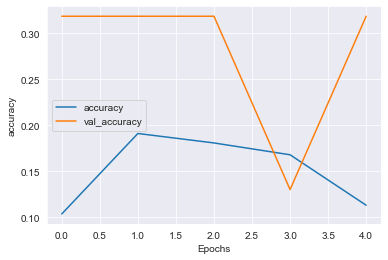

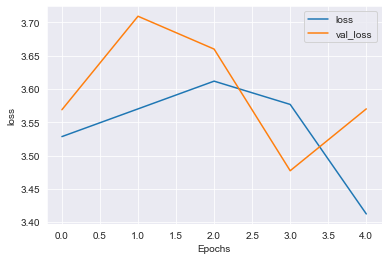

In [297]:
# Plot Utility
def plot_graphs(graph, string):
    plt.plot(graph.history[string])
    plt.plot(graph.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [289]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.

    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)

    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [290]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)

    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive

    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [292]:
LR = 1e-3  # Keep it small when transfer learning
EPOCHS = 10

# Compile the model to configure the training process.
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss=macro_soft_f1,
    metrics=[macro_f1, 'accuracy'])

In [293]:
history = model.fit(padded, y_train_bin,
                    epochs=EPOCHS,
                    validation_data=(testing_padded, y_val_bin))

Epoch 1/10
37/37 [==============================] - 15s 184ms/step - loss: 0.8154 - macro_f1: 0.1862 - accuracy: 0.3196 - val_loss: 0.8104 - val_macro_f1: 0.1910 - val_accuracy: 0.3185
Epoch 2/10
37/37 [==============================] - 5s 148ms/step - loss: 0.8146 - macro_f1: 0.1861 - accuracy: 0.3196 - val_loss: 0.8104 - val_macro_f1: 0.1910 - val_accuracy: 0.3185
Epoch 3/10
37/37 [==============================] - 6s 151ms/step - loss: 0.8148 - macro_f1: 0.1855 - accuracy: 0.3196 - val_loss: 0.8104 - val_macro_f1: 0.1910 - val_accuracy: 0.3185
Epoch 4/10
37/37 [==============================] - 5s 147ms/step - loss: 0.8150 - macro_f1: 0.1847 - accuracy: 0.3196 - val_loss: 0.8104 - val_macro_f1: 0.1910 - val_accuracy: 0.3185
Epoch 5/10
37/37 [==============================] - 6s 149ms/step - loss: 0.8143 - macro_f1: 0.1856 - accuracy: 0.3196 - val_loss: 0.8104 - val_macro_f1: 0.1910 - val_accuracy: 0.3185
Epoch 6/10
37/37 [==============================] - 6s 150ms/step - loss: 0.814

In [ ]:
CSV_PATH = 'cleaned_dataset.csv'
LANG = 'idn'
API = 'google'


def translator_constructor(api):
    if api == 'google':
        return ts.google
    elif api == 'bing':
        return ts.bing
    elif api == 'baidu':
        return ts.baidu
    elif api == 'sogou':
        return ts.sogou
    elif api == 'youdao':
        return ts.youdao
    elif api == 'tencent':
        return ts.tencent
    elif api == 'alibaba':
        return ts.alibaba
    else:
        raise NotImplementedError(f'{api} translator is not realised!')


def translate(x):
    try:
        return [x[0], translator_constructor(API)(x[1], 'en', LANG), x[2]]
    except:
        return [x[0], None, [2]]


def imap_unordered_bar(func, args, n_processes: int = 48):
    p = Pool(n_processes, maxtasksperchild=100)
    res_list = []
    with tqdm(total=len(args)) as pbar:
        for idx, res in tqdm(enumerate(p.imap_unordered(func, args))):
            pbar.update()
            res_list.append(res)
    pbar.close()
    p.close()
    p.join()
    return res_list


def back_translate():
    df = pd.read_csv(CSV_PATH).sample(100)
    tqdm.pandas()
    df[['id', 'text', 'Penyakit']] = imap_unordered_bar(translate, df[['id', 'text', 'Penyakit']].values)
    df.to_csv(f'augmented_data-{API}-{LANG}.csv')

In [ ]:
back_translate()

  0%|          | 0/100 [00:00<?, ?it/s]
0it [00:00, ?it/s]Exception in thread Thread-5 (_handle_workers):
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\multiprocessing\pool.py", line 513, in _handle_workers
    cls._maintain_pool(ctx, Process, processes, pool, inqueue,
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\multiprocessing\pool.py", line 337, in _maintain_pool
    Pool._repopulate_pool_static(ctx, Process, processes, pool,
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\multiprocessing\pool.py", line 326, in _repopulate_pool_static
    w.start()
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\multiproces